In [1]:
#K-means clustering 'codebasics utube'
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Linear Dataset/kmeans.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


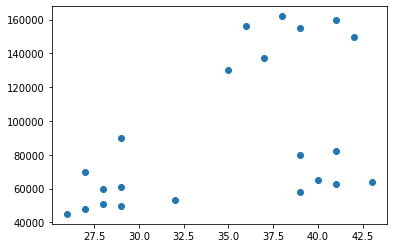

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['Cluster']=y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


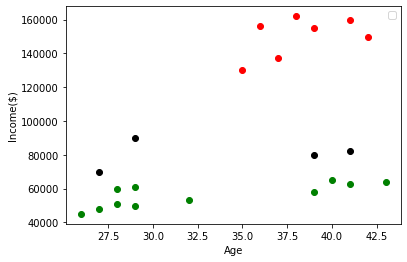

In [8]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

We can see that red cluster is fine, but green and black aren't since feature scaling is not done and y-axis has larger values compared to X-axis, hence doing feature scaling using min_max scalar

In [15]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [17]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [18]:
df['Cluster']=y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


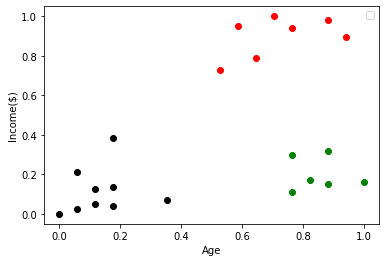

In [19]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

You can see now how well clustering is done 

In [20]:
#Centroids
km.cluster_centers_ #are centroids

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

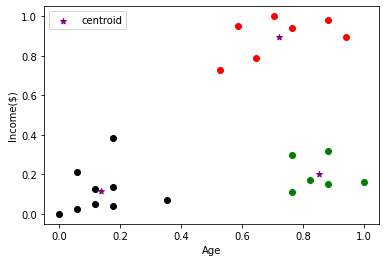

In [21]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

# Plotting Centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [22]:
#Elbow Plot -> help to find out 'k'
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    # km.inertia_ ->give you sum of squared error(sse)
    sse.append(km.inertia_)
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.22020960864009392,
 0.16858512236029757,
 0.1327661931978319,
 0.10497488680620908]

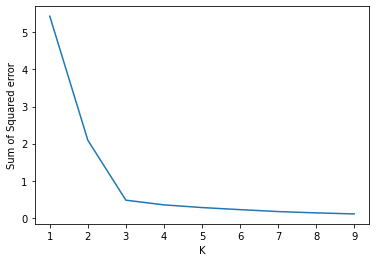

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

We can clearly see that elbow is at K=3